In [90]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [91]:
base_turismo = pd.read_excel(
    r"..\bdd\bdd_limpia\base_turismo_clean.xlsx")
base_turismo

,num_noches_durmieron,gasto_alojamiento,gasto_alimentacion,gasto_transporte,gasto_visitas,gasto_discotecas,mes_viaje,principal_actividad1,destino_principal_viaje,gasto_tot
0,0,0,20,0,0,0,Febrero,"Visita a festivales, ferias",Gualaceo,20
1,0,0,100,0,0,0,Diciembre,Visita a playas,Playas,100
2,2,0,60,0,0,0,Enero,Visita a atractivos naturales,Machala,60
3,3,0,15,20,0,0,Febrero,Visita a balnearios,Calvas,35
4,1,0,30,10,0,0,Febrero,Visita a balnearios,Paute,40
...,...,...,...,...,...,...,...,...,...,...
2146,2,0,75,0,0,0,Febrero,Actividades relacionadas con su trabajo,Quito,75
2147,0,0,40,0,0,0,Enero,Visita a atractivos naturales,Loreto,40
2148,3,0,20,32,0,0,Febrero,Visita a balnearios,Machala,52
2149,0,0,0,2,2,2,Febrero,Visita a atractivos históricos,Santo Domingo,6


#### **Selección de variables categóricas y numéricas**

In [92]:
# Variables numéricas (ejemplo)
numerical_cols = [
    "num_noches_durmieron",
    "gasto_alojamiento", 
    "gasto_alimentacion",
    "gasto_transporte", 
    "gasto_visitas",
    "gasto_discotecas"]

# Variables categóricas
categorical_cols = ["mes_viaje", "principal_actividad1", "destino_principal_viaje"]

# Crear matriz para K-Prototypes
X = base_turismo[numerical_cols + categorical_cols].copy()

#### **Escalar variables numéricas**

In [93]:
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#### **Unión de variables numéricas escaladas y categóricas**

In [94]:
X_matrix = X.to_numpy()
categorical_idx = [X.columns.get_loc(col) for col in categorical_cols]

#### **Estimación de cluster a elegir**

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


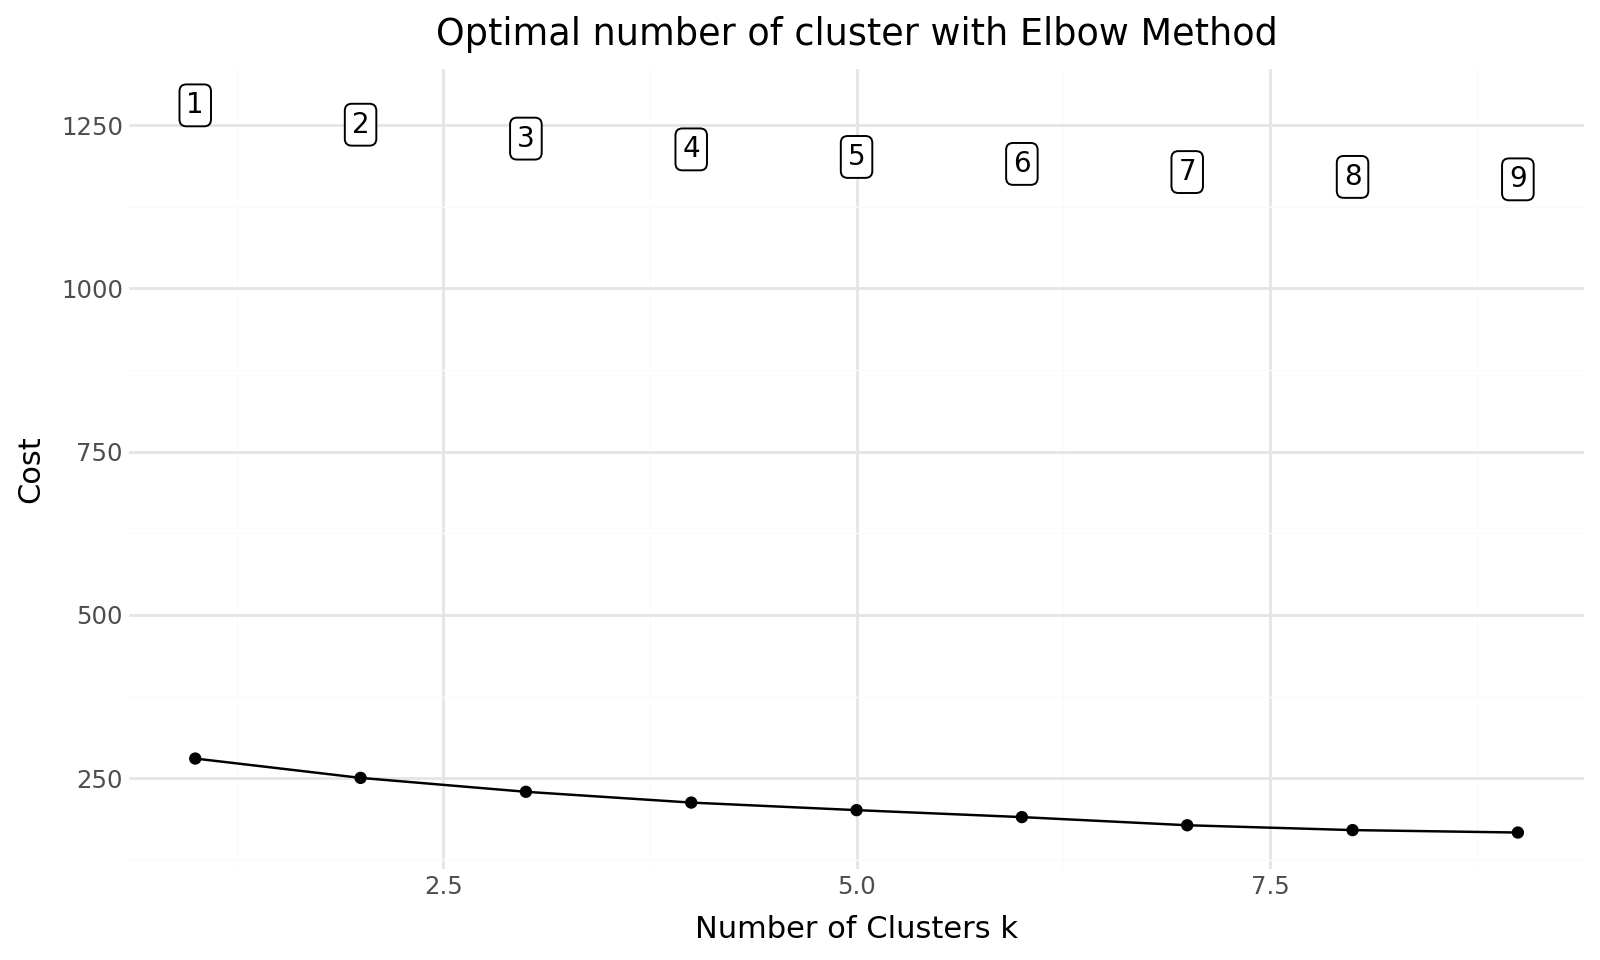

In [95]:
from plotnine import *
import plotnine
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(X_matrix, categorical = categorical_idx)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, len(cost)+1), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(
        x = 'Cluster',
        y = 'Cost'))+
    geom_point(aes(
        x = 'Cluster',
        y = 'Cost'))+
    geom_label(aes(
        x = 'Cluster',
        y = 'Cost',
        label = 'Cluster'),
        size = 10,
        nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

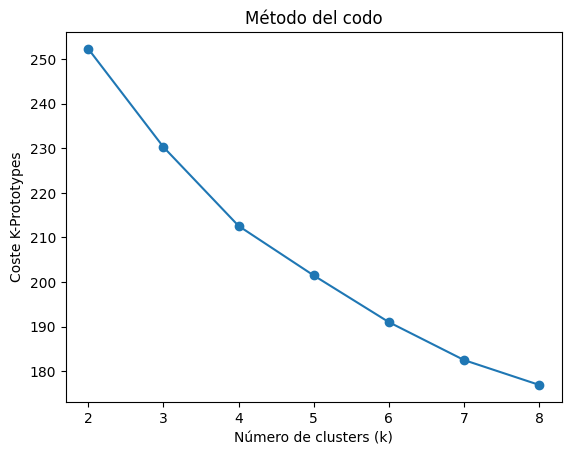

In [96]:
cost = []
K = range(2, 9)  # prueba de 2 a 7 clusters

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_init=5)
    clusters = kproto.fit_predict(X_matrix, categorical=categorical_idx)
    cost.append(kproto.cost_)

# Graficar
plt.plot(K, cost, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coste K-Prototypes')
plt.title('Método del codo')
plt.show()


#### **Cluster elegidos**

In [97]:
# Supongamos que el método del codo indicó k_opt = 3
k_opt = 3

kproto = KPrototypes(n_clusters=k_opt, init='Cao', random_state=42, n_init=5)
clusters = kproto.fit_predict(X_matrix, categorical=categorical_idx)

# Guardar cluster en el dataframe
base_turismo['cluster'] = clusters
base_turismo

,num_noches_durmieron,gasto_alojamiento,gasto_alimentacion,gasto_transporte,gasto_visitas,gasto_discotecas,mes_viaje,principal_actividad1,destino_principal_viaje,gasto_tot,cluster
0,0,0,20,0,0,0,Febrero,"Visita a festivales, ferias",Gualaceo,20,2
1,0,0,100,0,0,0,Diciembre,Visita a playas,Playas,100,2
2,2,0,60,0,0,0,Enero,Visita a atractivos naturales,Machala,60,1
3,3,0,15,20,0,0,Febrero,Visita a balnearios,Calvas,35,0
4,1,0,30,10,0,0,Febrero,Visita a balnearios,Paute,40,0
...,...,...,...,...,...,...,...,...,...,...,...
2146,2,0,75,0,0,0,Febrero,Actividades relacionadas con su trabajo,Quito,75,1
2147,0,0,40,0,0,0,Enero,Visita a atractivos naturales,Loreto,40,1
2148,3,0,20,32,0,0,Febrero,Visita a balnearios,Machala,52,0
2149,0,0,0,2,2,2,Febrero,Visita a atractivos históricos,Santo Domingo,6,2


#### **Gráficos**

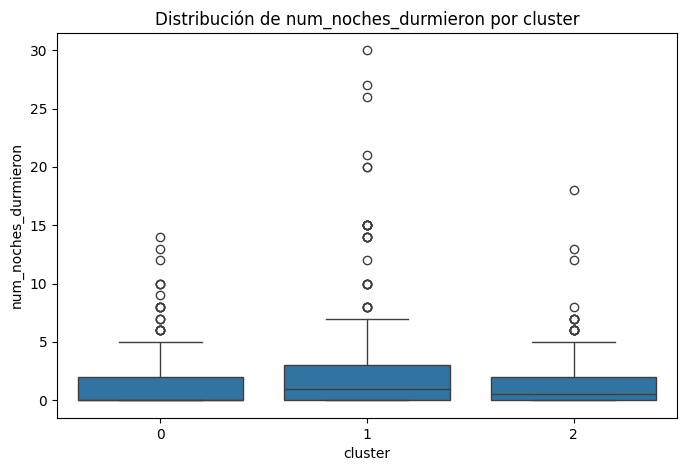

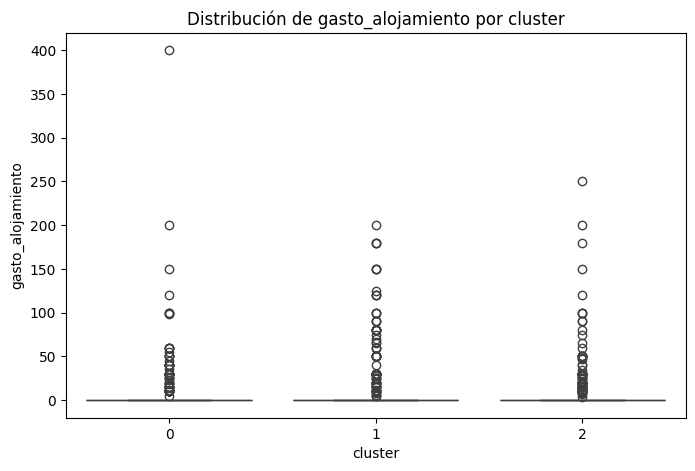

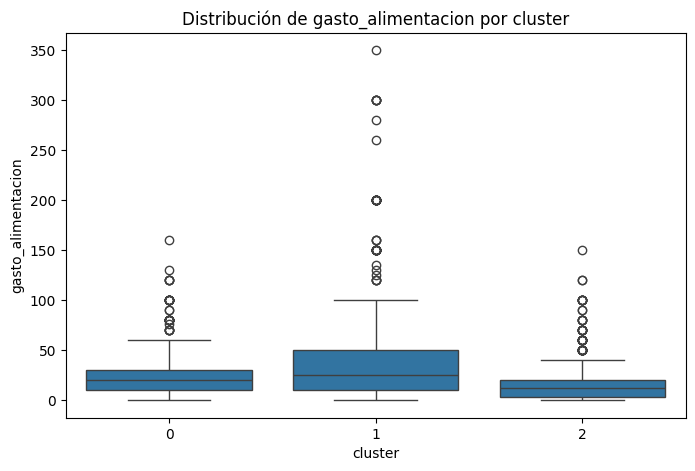

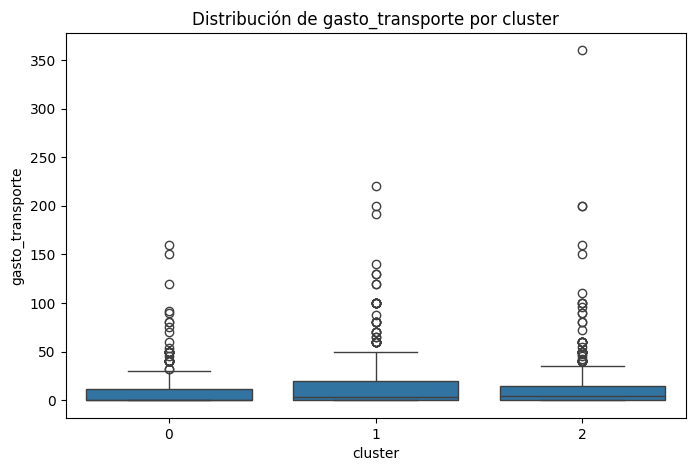

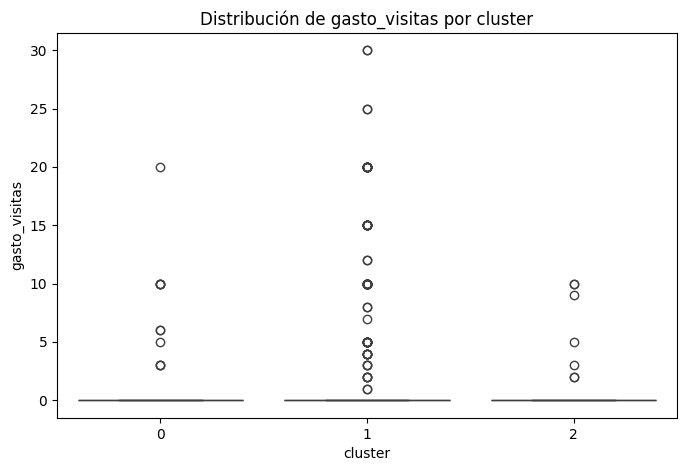

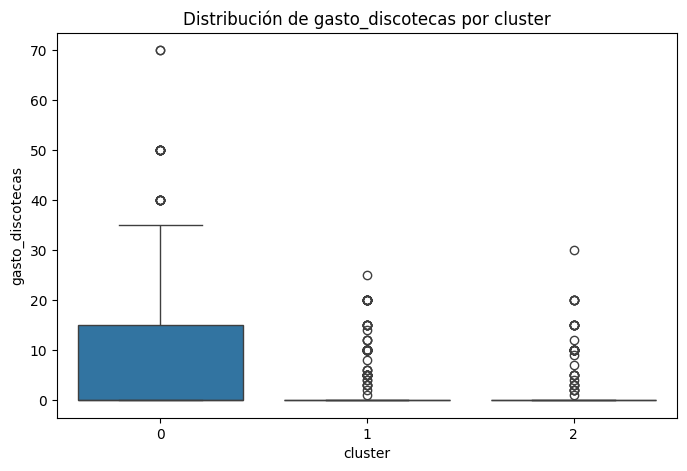

In [98]:

numerical_cols = [
    "num_noches_durmieron",
    "gasto_alojamiento", 
    "gasto_alimentacion",
    "gasto_transporte", 
    "gasto_visitas",
    "gasto_discotecas"]

for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='cluster', y=col, data=base_turismo)
    plt.title(f'Distribución de {col} por cluster')
    plt.show()


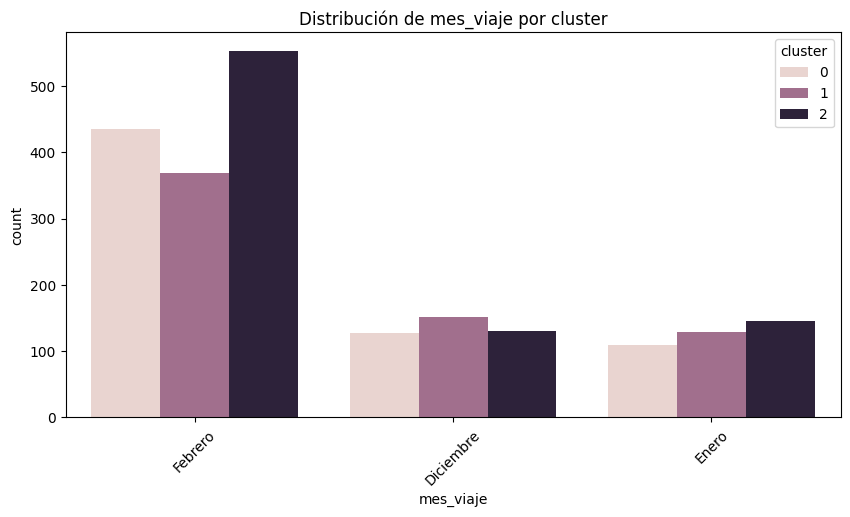

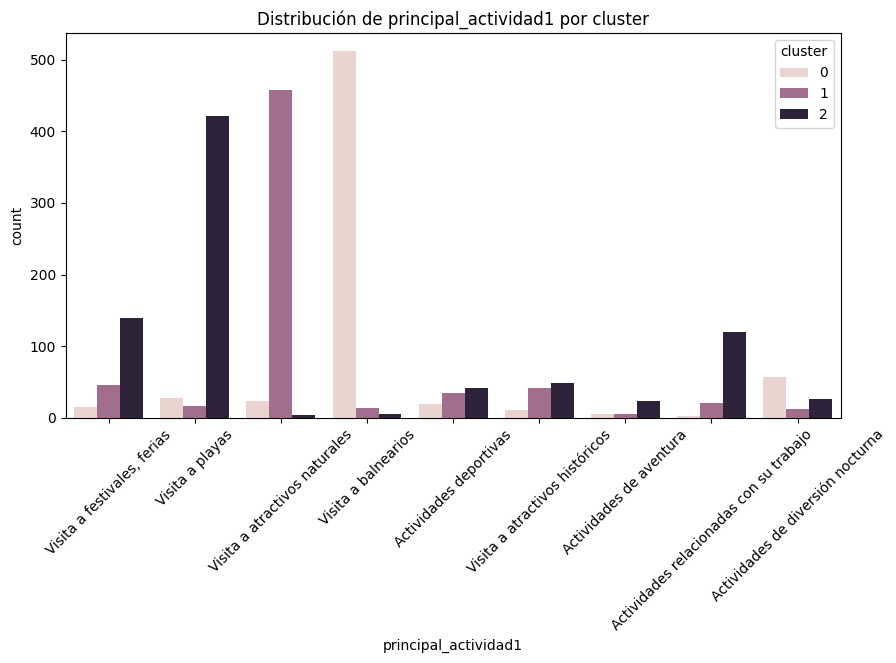

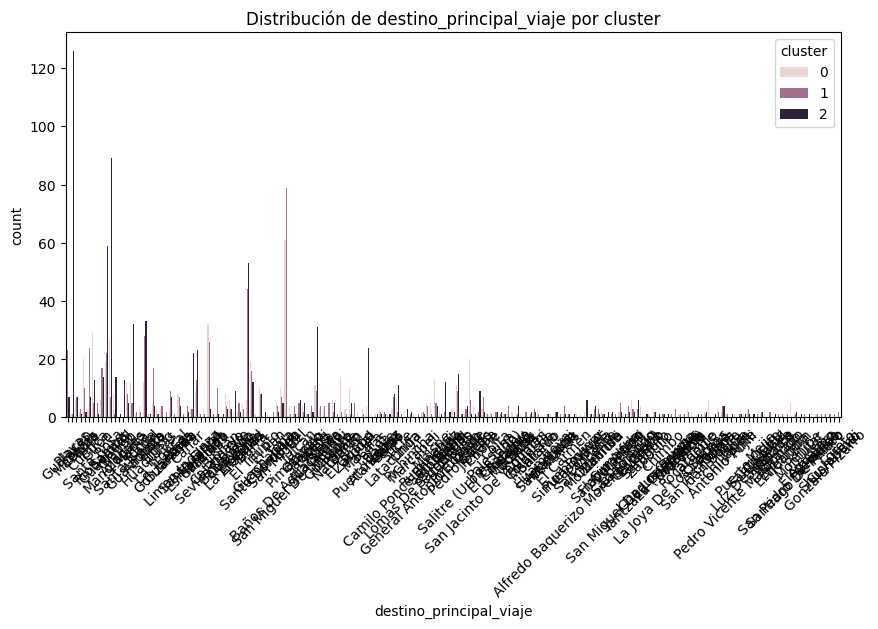

In [99]:
categorical_cols = ["mes_viaje", "principal_actividad1", "destino_principal_viaje"]

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='cluster', data=base_turismo)
    plt.title(f'Distribución de {col} por cluster')
    plt.xticks(rotation=45)
    plt.show()


In [100]:
# Crear diccionario para guardar información de cada cluster
cluster_info = {}

for c in range(k_opt):
    sub = base_turismo[base_turismo['cluster'] == c]
    
    # Top 3 actividades
    top_actividades = sub['principal_actividad1'].value_counts().head(3).index.tolist()
    
    # Top 3 destinos
    top_destinos = sub['destino_principal_viaje'].value_counts().head(3).index.tolist()
    
    # Promedios de gasto por categoría
    medias_gasto = sub[["gasto_alojamiento","gasto_alimentacion","gasto_transporte",
                        "gasto_visitas","gasto_discotecas"]].mean().to_dict()
    
    # Proporciones de gasto (para aplicar a un presupuesto de usuario)
    total_media = sum(medias_gasto.values()) if sum(medias_gasto.values())>0 else 1.0
    proporciones_gasto = {k: v/total_media for k,v in medias_gasto.items()}
    
    cluster_info[c] = {
        "top_actividades": top_actividades,
        "top_destinos": top_destinos,
        "medias_gasto": medias_gasto,
        "proporciones_gasto": proporciones_gasto,
        "noches_promedio": sub['num_noches_durmieron'].mean(),
        "presupuesto_promedio": sub[["gasto_alojamiento","gasto_alimentacion",
                                     "gasto_transporte","gasto_visitas",
                                     "gasto_discotecas"]].sum(axis=1).mean(),
        "count": len(sub)
    }

# Revisar resultados
for c, info in cluster_info.items():
    print(f"\nCluster {c} (n={info['count']}):")
    print(f" Top 3 actividades: {info['top_actividades']}")
    print(f" Top 3 destinos: {info['top_destinos']}")
    print(f" Promedios de gasto: {info['medias_gasto']}")
    print(f" Proporciones de gasto: {info['proporciones_gasto']}")



Cluster 0 (n=672):
 Top 3 actividades: ['Visita a balnearios', 'Actividades de diversión nocturna', 'Visita a playas']
 Top 3 destinos: ['Baños De Agua Santa', 'Gualaceo', 'Pastaza']
 Promedios de gasto: {'gasto_alojamiento': 4.248511904761905, 'gasto_alimentacion': 24.760416666666668, 'gasto_transporte': 8.882440476190476, 'gasto_visitas': 0.12797619047619047, 'gasto_discotecas': 8.431547619047619}
 Proporciones de gasto: {'gasto_alojamiento': 0.09146243793048214, 'gasto_alimentacion': 0.5330450104116611, 'gasto_transporte': 0.19122216882908857, 'gasto_visitas': 0.0027550856959794967, 'gasto_discotecas': 0.1815152971327887}

Cluster 1 (n=649):
 Top 3 actividades: ['Visita a atractivos naturales', 'Visita a festivales, ferias', 'Visita a atractivos históricos']
 Top 3 destinos: ['Baños De Agua Santa', 'Quito', 'Ambato']
 Promedios de gasto: {'gasto_alojamiento': 6.833590138674884, 'gasto_alimentacion': 40.91217257318952, 'gasto_transporte': 14.66255778120185, 'gasto_visitas': 1.587057

In [ ]:
import pickle

# Diccionario a guardar
data_to_save = {
    "kproto": kproto,
    "scaler": scaler,
    "cluster_info": cluster_info,
    "numerical_cols": numerical_cols,
    "categorical_cols": categorical_cols
}

# Guardar en pickle
with open(r"..\modelo_recomendador.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

print("Modelo guardado en 'modelo_recomendador.pkl'")

Modelo guardado en 'modelo_recomendador.pkl'
